# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
ames=pd.read_csv("ames.csv",index_col=0)



Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
ames.isna().sum().sort_values(ascending=False)
null_columns=[]
for key,value in ames.isna().sum().sort_values(ascending=False).items():
    if value>0:
        null_columns.append(key)
null_columns
ames=ames.drop(columns=null_columns)
ames.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null   ob

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [4]:
# Your code here - continuous numeric predictor
int_cols=[]
for col in ames.columns:
    if ames[col].dtype=="int64":
        if col=="SalePrice":
            continue
        else:
            int_cols.append(col)
int_cols
int_df=ames[int_cols]
int_df






,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
2,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
3,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
4,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
5,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010


### Discrete Numeric Predictor

In [5]:
# Your code here - discrete numeric predictor
# Your code here - continuous numeric predictor
float_cols=[]
for col in ames.columns:
    if ames[col].dtype=="float64":
        if col=="SalePrice":
            continue
        else:
            float_cols.append(col)
float_df=ames[float_cols]
float_df


""
Id
1
2
3
4
5
...
1456
1457
1458


### String Categorical Predictor

In [6]:
# Your code here - string categorical predictor
str_col=[]
for col in ames.columns:
    if ames[col].dtype=="object":
        if col=="SalePrice":
            continue
        else:
            str_col.append(col)
str_col
str_df=ames[str_col]
str_df


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


### Discrete Categorical Predictor

In [7]:
# Your code here - discrete categorical predictor


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [44]:
# Your code here - prepare X and y, including one-hot encoding
y=pd.DataFrame(ames["SalePrice"])
corr_df=pd.concat([int_df,y],axis=1)
corr=corr_df.corr()
(corr["SalePrice"])
high_corr=[]
for key,value in corr["SalePrice"].items():
    if value>0.7 or value<-0.7:
        high_corr.append(key)
len(high_corr)==len(corr_df.columns)
high_corr
# defining the predictor variables
X=corr_df[high_corr]

# extracting predictor columns from string objects
pred_str=[]
for key,value in str_df.nunique().items():
    if value<=3:
        pred_str.append(key)
print(pred_str)
# coming up with final pred df
X_pred=pd.concat([X,str_df[pred_str]],axis=1)
X_pred



['Street', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive']


,OverallQual,GrLivArea,SalePrice,Street,Utilities,LandSlope,CentralAir,PavedDrive
Id,,,,,,,,
1,7,1710,208500,Pave,AllPub,Gtl,Y,Y
2,6,1262,181500,Pave,AllPub,Gtl,Y,Y
3,7,1786,223500,Pave,AllPub,Gtl,Y,Y
4,7,1717,140000,Pave,AllPub,Gtl,Y,Y
5,8,2198,250000,Pave,AllPub,Gtl,Y,Y
...,...,...,...,...,...,...,...,...
1456,6,1647,175000,Pave,AllPub,Gtl,Y,Y
1457,6,2073,210000,Pave,AllPub,Gtl,Y,Y
1458,7,2340,266500,Pave,AllPub,Gtl,Y,Y


In [36]:
corr = corr_df.corr()['SalePrice']
corr

MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [ ]:
# Your answer here - which category or categories were dropped?


In [50]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
X_encode=pd.get_dummies(X_pred,columns=pred_str,drop_first="True",dtype="int64")
X_encode=X_encode.drop(columns=["SalePrice"])
model=sm.OLS(y,sm.add_constant(X_encode))
results=model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     429.4
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        09:43:57   Log-Likelihood:                -17596.
No. Observations:                1460   AIC:                         3.521e+04
Df Residuals:                    1450   BIC:                         3.526e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -1.3e+05   1.81e+04     -7.192      0.000   -1.65e+05   -9.46e+04
OverallQual       3.153e+04   1034.906     30.468      0.000    2.95e+04    3.36e+04
GrLivArea           55.9521      2.605     21.482      0.000      50.843      61.061
Street_Pave       1400.0883   1.74e+04      0.081      0.936   -3.27e+04    3.55e+04
Utilities_NoSeWa -3.189e+04   4.16e+04     -0.766      0.444   -1.14e+05    4.98e+04
LandSlope_Mod     2.231e+04   5369.948      4.154      0.000    1.18e+04    3.28e+04
LandSlope_Sev     3.944e+04   1.17e+04      3.369      0.001    1.65e+04    6.24e+04
CentralAir_Y      1.526e+04   4823.160      3.165      0.002    5801.900    2.47e+04
PavedDrive_P      -477.8831   8818.424     -0.054      0.957   -1.78e+04    1.68e+04
PavedDrive_Y      1.836e+04   4855.442      3.782      0.000    8837.882    2.79e+04
==============================================================================
Omnibus:                      380.386   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10429.341
Skew:                           0.590   Prob(JB):                         0.00
Kurtosis:                      16.040   Cond. No.                     6.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

c:\Users\HomePC\anaconda3.1\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\HomePC\anaconda3.1\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\HomePC\anaconda3.1\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as

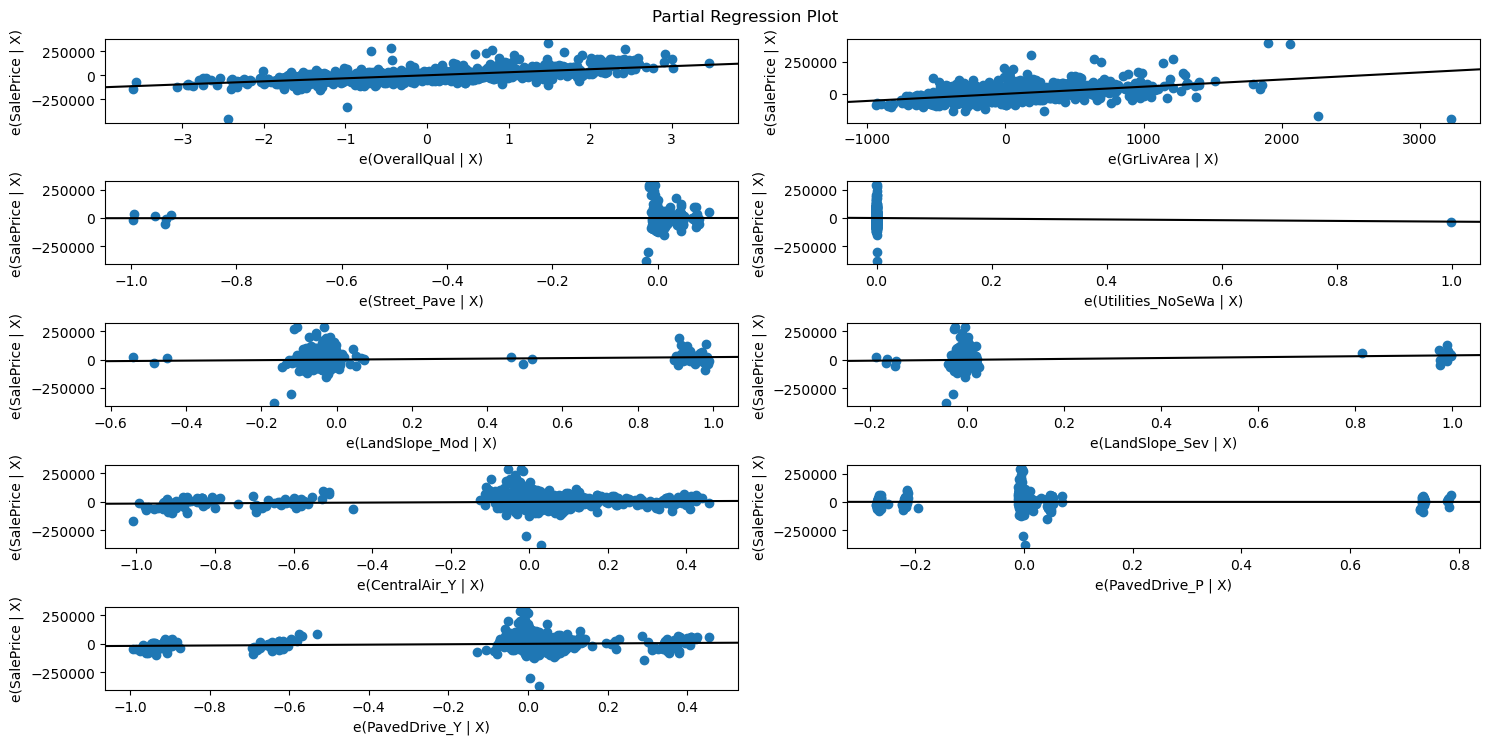

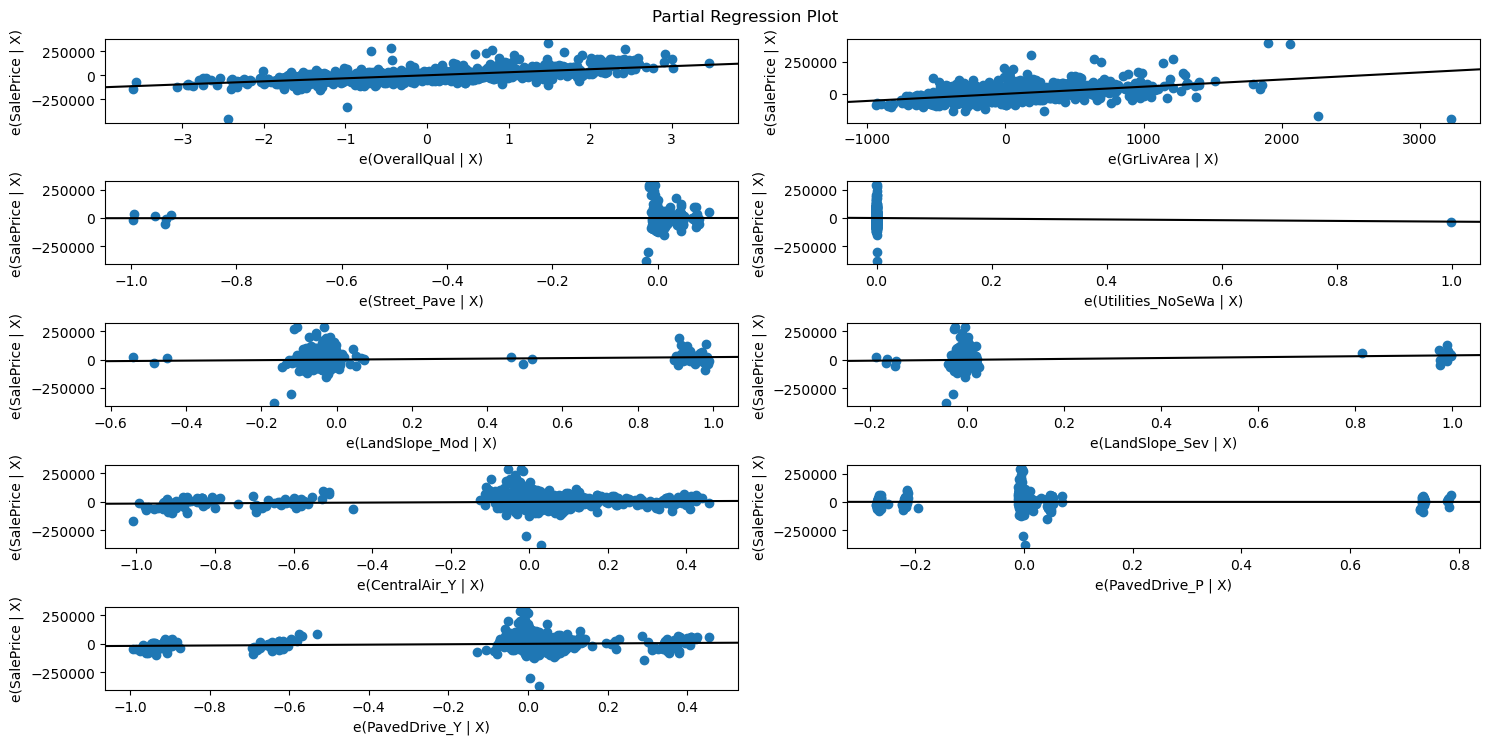

In [55]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results,exog_idx=list(X_encode),fig=fig,grid=(7,2))



## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [62]:
# Your code here - calculate an error-based metric
mae=sum(results.resid.abs())/len(y)
print(f"mae{mae}")
rmse=(sum(results.resid**2)/len(y))**0.5
print(f"rmse{rmse}")

mae27811.51375871197
rmse41481.41958201013


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [63]:
# Your answer here
"our model has an r_adjusted value 0.7 meaning that the predictor variables explain most of the variance in the predicted variable. the model has a f p value of 0.0 which is less than oyr alpha which is 0.05 hence our model is statistically significant. our model has some variables which sre not statistically significant in the model. the mean absolute error is 27811 and the rooted mean squared error which are very large errors indicating that our model might not be perfoming well in predicting the dependent variable. we might need to adjust some features."


'our model has an r_adjusted value 0.7 meaning that the predictor variables explain most of the variance in the predicted variable. the model has a f p value of 0.0 which is less than oyr alpha which is 0.05 hence our model is statistically significant. our model has some variables which sre not statistically significant in the model. the mean absolute error is 27811 and the rooted mean squared error which are very large errors indicating that our model might not be perfoming well in predicting the dependent variable. we might need to adjust some features.'

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [ ]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.